# 曽呂利新左衛門問題

「Pythonを使ってみよう」の問題で扱った紙を折ると月に届く話に似たものとして、曽呂利新左衛門の逸話があります。これを題材にプログラミングを進めます。


秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。

## 【問題1】100日目の米粒の数
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [31]:
num_rice = 1
sum_rice = num_rice
num_rice_list = [num_rice]
sum_rice_list = [sum_rice]
days = 100

for i in range(days-1):
    num_rice *= 2
    sum_rice += num_rice
    num_rice_list.append(num_rice)
    sum_rice_list.append(sum_rice)

num_rice_100 = num_rice_list[-1]
print('{}日目には合計で米粒を{}粒もらっている'.format(days, num_rice_100))

100日目には合計で米粒を633825300114114700748351602688粒もらっている


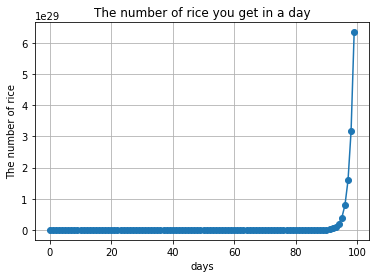

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(num_rice_list, marker='o')
plt.title('The number of rice you get in a day')
plt.xlabel('days')
plt.ylabel('The number of rice')
plt.grid()
plt.show()

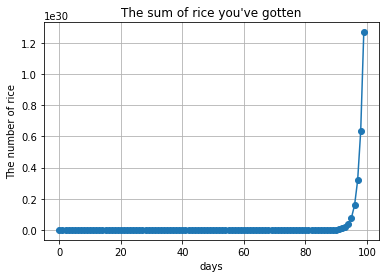

In [33]:
plt.plot(sum_rice_list, marker='o')
plt.title("The sum of rice you've gotten")
plt.xlabel('days')
plt.ylabel('The number of rice')
plt.grid()
plt.show()

## 【問題2】100日目以外の米粒の数
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。


以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

In [43]:
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """

    num_rice = 1
    sum_rice = num_rice
    list_n_grains = [num_rice]
    list_total_grains = [sum_rice]
    
    for i in range(day-1):
        num_rice *= 2
        sum_rice += num_rice
        list_n_grains.append(num_rice)
        list_total_grains.append(sum_rice)
    
    return list_n_grains, list_total_grains

list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=10)

In [44]:
print(list_n_grains, list_total_grains)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512] [1, 3, 7, 15, 31, 63, 127, 255, 511, 1023]


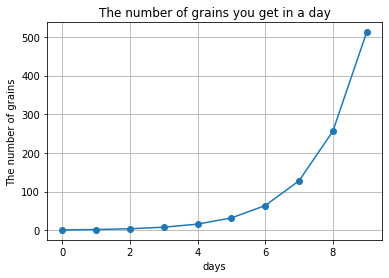

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list_n_grains, marker='o')
plt.title('The number of grains you get in a day')
plt.xlabel('days')
plt.ylabel('The number of grains')
plt.grid()
plt.show()

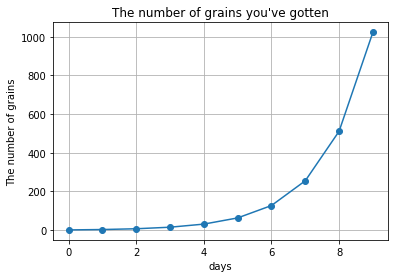

In [46]:
plt.plot(list_total_grains, marker='o')
plt.title("The number of grains you've gotten")
plt.xlabel('days')
plt.ylabel('The number of grains')
plt.grid()
plt.show()

In [52]:
course_days = 4*30
list_n_grains, list_total_grains = compute_sorori_shinzaemon(course_days)
sum_rice = list_total_grains[-1]
print('コースを受講する{}日の間で{}粒もらえる'.format(course_days, sum_rice))

コースを受講する120日の間で1329227995784915872903807060280344575粒もらえる


## 【問題3】何人が何日生活できる米か
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。


ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [53]:
def calc_days(num_rice, num_ppl):
    num_rice_per_day = 6000 * 2 * num_ppl #1日1人当たり2合(1合6000粒)食べる
    day = num_rice // num_rice_per_day
    return day

In [57]:
course_days = 4*30
members = 14
list_n_grains, list_total_grains = compute_sorori_shinzaemon(course_days)
sum_rice = list_total_grains[-1]
day = calc_days(sum_rice, members)
print('この米があれば{}人が{}日生活できる'.format(members, day))

この米があれば14人が7912071403481642100617899168335日生活できる
